In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('processed_countries_data.csv')
df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,36.438987,1.415197e+10,10.902580,42.543697,...,19542982.0,652860.0,Asia,8.541387e+09,9.727140e+09,1.934589e+09,1.542930e+09,-2.340244e+08,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,36.438987,1.415197e+10,10.902580,42.543697,...,19688632.0,652860.0,Asia,8.541387e+09,9.727140e+09,1.934589e+09,1.542930e+09,-2.340244e+08,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,36.438987,3.854235e+09,9.443391,42.543697,...,21000256.0,652860.0,Asia,8.541387e+09,9.727140e+09,5.268779e+08,3.639705e+08,-2.340244e+08,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,36.438987,4.539497e+09,8.941258,42.543697,...,22645130.0,652860.0,Asia,8.541387e+09,9.727140e+09,6.205538e+08,4.058881e+08,-2.340244e+08,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,36.438987,5.220825e+09,9.808474,42.543697,...,23553551.0,652860.0,Asia,8.541387e+09,9.727140e+09,7.136921e+08,5.120832e+08,-2.340244e+08,221.657662,36.077491


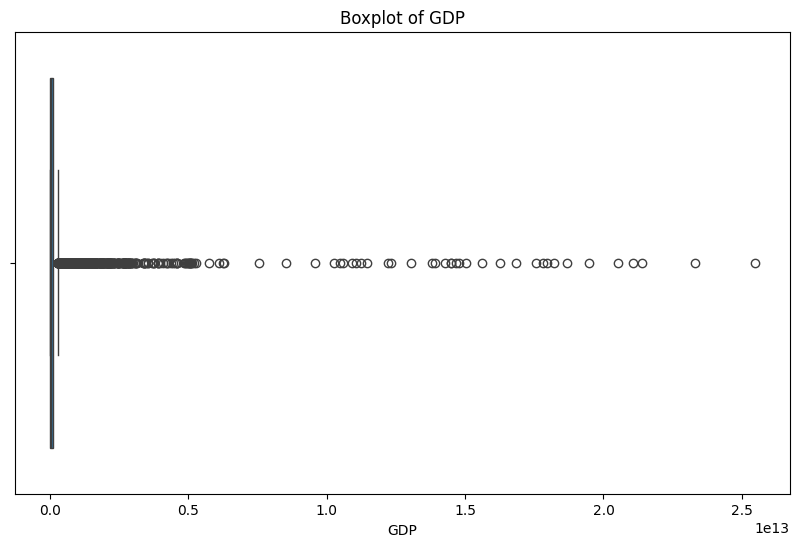

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GDP'])
plt.title('Boxplot of GDP')
plt.show()

In [ ]:
# List of columns to check for outliers
columns_to_check = ['Agriculture (% GDP)', 'Ease of Doing Business', 'Education Expenditure (% GDP)',
 'Export (% GDP)', 'GDP', 'Health Expenditure (% GDP)', 'Import (% GDP)',
 'Industry (% GDP)', 'Inflation Rate', 'R&D', 'Service (% GDP)',
 'Unemployment', 'Population', 'Land', 'Export', 'Import',
 'Education Expenditure', 'Health Expenditure', 'Net Trade',
 'GDP Per Capita', 'Population Density']

# Dictionary to store outlier information for each column
outlier_info = {}

for column in columns_to_check:
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Store outlier information
    outlier_info[column] = outliers

    print(f"Outliers detected in {column}:")
    print(outliers)
    print("\n")


Outliers detected in Agriculture (% GDP):
              Country Name Country Code  Year  Agriculture (% GDP)  \
2              Afghanistan          AFG  2002            38.627892   
3              Afghanistan          AFG  2003            37.418855   
759                Burundi          BDI  2000            44.107040   
760                Burundi          BDI  2001            43.843142   
761                Burundi          BDI  2002            43.333611   
...                    ...          ...   ...                  ...   
4350                 Sudan          SDN  2003            38.416611   
4456  Syrian Arab Republic          SYR  2017            40.635608   
4457  Syrian Arab Republic          SYR  2018            39.009881   
4458  Syrian Arab Republic          SYR  2019            40.741045   
4566                  Togo          TGO  2012            37.376055   

      Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
2                  40.717968          

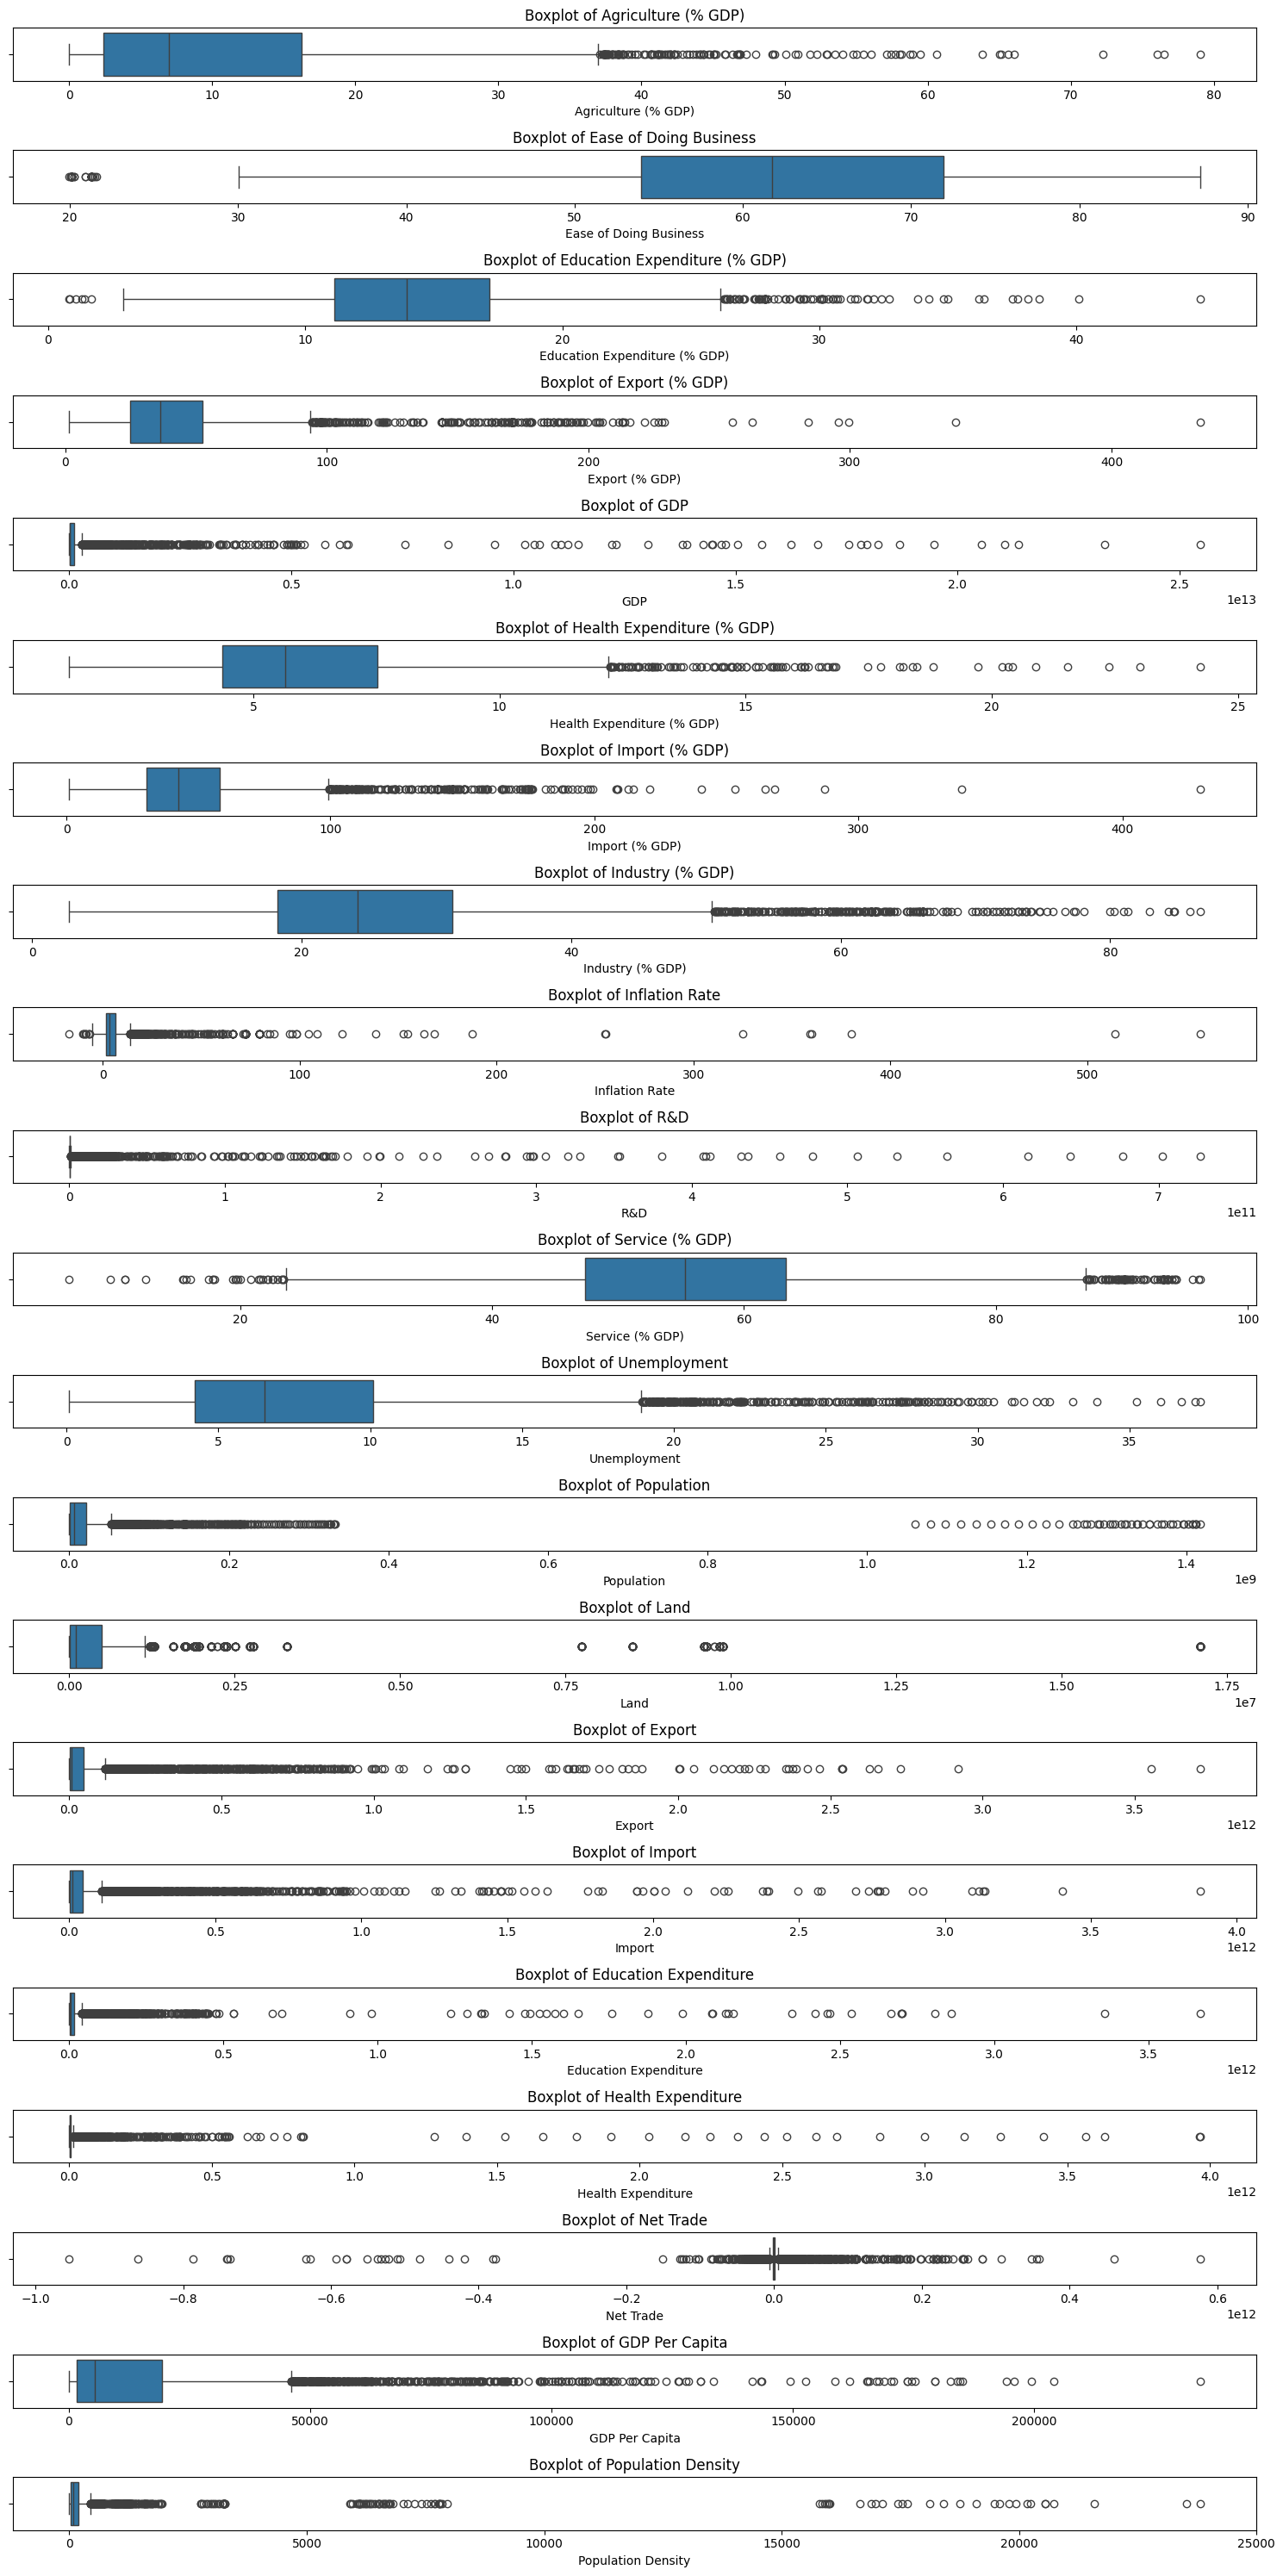

In [ ]:


# Set the size of the plots
plt.figure(figsize=(15, 30))  # Adjust the figure size as needed

# Loop through each column to create a box plot
for i, column in enumerate(columns_to_check):
    plt.subplot(len(columns_to_check), 1, i + 1)  # Create a subplot for each column
    sns.boxplot(x=df[column])  # Create the box plot
    plt.title(f'Boxplot of {column}')  # Title for each plot
    plt.xlabel(column)  # Label for x-axis

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plots


In [ ]:
# Define the threshold percentage
threshold = 0.05  # Example: 5%

# Dictionary to store outlier percentages
outlier_percentages = {}

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    total_count = df[column].notnull().sum()  # Exclude NaN values
    outlier_percentage = outlier_count / total_count

    outlier_percentages[column] = outlier_percentage

    if outlier_percentage > threshold:
        print(f"{column}: Outlier percentage is {outlier_percentage:.2%}. Leave outliers as is.")
    else:
        print(f"{column}: Outlier percentage is {outlier_percentage:.2%}. Consider treating outliers.")
        # Example treatment: remove outliers
        df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

# Check the updated DataFrame after treatment
print(df.shape)


Agriculture (% GDP): Outlier percentage is 2.59%. Consider treating outliers.
Ease of Doing Business: Outlier percentage is 0.92%. Consider treating outliers.
Education Expenditure (% GDP): Outlier percentage is 1.56%. Consider treating outliers.
Export (% GDP): Outlier percentage is 4.80%. Consider treating outliers.
GDP: Outlier percentage is 15.20%. Leave outliers as is.
Health Expenditure (% GDP): Outlier percentage is 1.75%. Consider treating outliers.
Import (% GDP): Outlier percentage is 2.47%. Consider treating outliers.
Industry (% GDP): Outlier percentage is 6.10%. Leave outliers as is.
Inflation Rate: Outlier percentage is 7.50%. Leave outliers as is.
R&D: Outlier percentage is 19.23%. Leave outliers as is.
Service (% GDP): Outlier percentage is 2.69%. Consider treating outliers.
Unemployment: Outlier percentage is 5.69%. Leave outliers as is.
Population: Outlier percentage is 11.61%. Leave outliers as is.
Land: Outlier percentage is 9.73%. Leave outliers as is.
Export: Outl

In [ ]:
# Example treatment for columns to consider
for column in ['Agriculture (% GDP)', 'Ease of Doing Business', 'Education Expenditure (% GDP)',
               'Export (% GDP)', 'Health Expenditure (% GDP)', 'Import (% GDP)',
               'Service (% GDP)']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Check the updated DataFrame after treatment
print(f"Updated DataFrame shape after treatment: {df.shape}")


Updated DataFrame shape after treatment: (4306, 25)


In [ ]:
# Calculate Net Trade
df['Net Trade'] = df['Export'] - df['Import']

# Calculate GDP Per Capita
df['GDP Per Capita'] = df['GDP'] / df['Population']

# Calculate Population Density
df['Population Density'] = df['Population'] / df['Land']


In [ ]:
df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,36.438987,1.415197e+10,10.902580,42.543697,...,19542982.0,652860.0,Asia,8.541387e+09,9.727140e+09,1.934589e+09,1.542930e+09,-1.185753e+09,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,36.438987,1.415197e+10,10.902580,42.543697,...,19688632.0,652860.0,Asia,8.541387e+09,9.727140e+09,1.934589e+09,1.542930e+09,-1.185753e+09,718.788917,30.157510
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,36.438987,5.220825e+09,9.808474,42.543697,...,23553551.0,652860.0,Asia,8.541387e+09,9.727140e+09,7.136921e+08,5.120832e+08,-1.185753e+09,221.657662,36.077491
5,Afghanistan,AFG,2005,31.114855,40.717968,15.080000,36.438987,6.226199e+09,9.948289,42.543697,...,24411191.0,652860.0,Asia,8.541387e+09,9.727140e+09,9.389108e+08,6.194003e+08,-1.185753e+09,255.055107,37.391157
6,Afghanistan,AFG,2006,28.635969,40.717968,12.880000,36.438987,6.971383e+09,10.622766,42.543697,...,25442944.0,652860.0,Asia,8.541387e+09,9.727140e+09,8.979142e+08,7.405537e+08,-1.185753e+09,274.000656,38.971516


In [ ]:
import pandas as pd

# Assuming df is your original DataFrame

# Columns to one-hot encode
columns_to_encode = ['Country Name', 'Country Code', 'Continent Name']

# One-hot encoding using get_dummies (this won't remove original columns)
df_onehot = pd.get_dummies(df[columns_to_encode], prefix=columns_to_encode, drop_first=True)

# Concatenate the original DataFrame with the new one-hot encoded columns
df = pd.concat([df, df_onehot], axis=1)

# Check the updated DataFrame to ensure original columns remain and new columns are added
print(df.head(5))



  Country Name Country Code  Year  Agriculture (% GDP)  \
0  Afghanistan          AFG  2000            27.501127   
1  Afghanistan          AFG  2001            27.501127   
4  Afghanistan          AFG  2004            29.721067   
5  Afghanistan          AFG  2005            31.114855   
6  Afghanistan          AFG  2006            28.635969   

   Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
0               40.717968                      13.670101       36.438987   
1               40.717968                      13.670101       36.438987   
4               40.717968                      13.670101       36.438987   
5               40.717968                      15.080000       36.438987   
6               40.717968                      12.880000       36.438987   

            GDP  Health Expenditure (% GDP)  Import (% GDP)  ...  \
0  1.415197e+10                   10.902580       42.543697  ...   
1  1.415197e+10                   10.902580       42.54369

In [ ]:
df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Country Code_WSM,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE,Continent Name_Asia,Continent Name_Europe,Continent Name_North America,Continent Name_Oceania,Continent Name_South America
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,36.438987,1.415197e+10,10.902580,42.543697,...,False,False,False,False,False,True,False,False,False,False
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,36.438987,1.415197e+10,10.902580,42.543697,...,False,False,False,False,False,True,False,False,False,False
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,36.438987,5.220825e+09,9.808474,42.543697,...,False,False,False,False,False,True,False,False,False,False
5,Afghanistan,AFG,2005,31.114855,40.717968,15.080000,36.438987,6.226199e+09,9.948289,42.543697,...,False,False,False,False,False,True,False,False,False,False
6,Afghanistan,AFG,2006,28.635969,40.717968,12.880000,36.438987,6.971383e+09,10.622766,42.543697,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of columns to standardize (numeric columns in the dataset)
columns_to_standardize = ['Agriculture (% GDP)', 'GDP', 'Health Expenditure (% GDP)',
                          'Import (% GDP)', 'Export (% GDP)', 'Industry (% GDP)',
                          'Inflation Rate', 'R&D', 'Service (% GDP)', 'Unemployment',
                          'Population', 'Land', 'Net Trade', 'GDP Per Capita',
                          'Population Density']

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply standard scaling to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Check the updated DataFrame
print(df.head(5))


  Country Name Country Code  Year  Agriculture (% GDP)  \
0  Afghanistan          AFG  2000             1.963005   
1  Afghanistan          AFG  2001             1.963005   
4  Afghanistan          AFG  2004             2.212539   
5  Afghanistan          AFG  2005             2.369208   
6  Afghanistan          AFG  2006             2.090568   

   Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
0               40.717968                      13.670101       -0.093385   
1               40.717968                      13.670101       -0.093385   
4               40.717968                      13.670101       -0.093385   
5               40.717968                      15.080000       -0.093385   
6               40.717968                      12.880000       -0.093385   

        GDP  Health Expenditure (% GDP)  Import (% GDP)  ...  \
0 -0.279791                    2.196980       -0.029304  ...   
1 -0.279791                    2.196980       -0.029304  ...   
4 

In [ ]:
df.head(5)

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Country Code_WSM,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE,Continent Name_Asia,Continent Name_Europe,Continent Name_North America,Continent Name_Oceania,Continent Name_South America
0,Afghanistan,AFG,2000,1.963005,40.717968,13.670101,-0.093385,-0.279791,2.196980,-0.029304,...,False,False,False,False,False,True,False,False,False,False
1,Afghanistan,AFG,2001,1.963005,40.717968,13.670101,-0.093385,-0.279791,2.196980,-0.029304,...,False,False,False,False,False,True,False,False,False,False
4,Afghanistan,AFG,2004,2.212539,40.717968,13.670101,-0.093385,-0.289593,1.710901,-0.029304,...,False,False,False,False,False,True,False,False,False,False
5,Afghanistan,AFG,2005,2.369208,40.717968,15.080000,-0.093385,-0.288490,1.773017,-0.029304,...,False,False,False,False,False,True,False,False,False,False
6,Afghanistan,AFG,2006,2.090568,40.717968,12.880000,-0.093385,-0.287672,2.072667,-0.029304,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('processed_dataset.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('processed_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>